In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function

In [7]:
import sys,os
import pandas as pd
import fastparquet
import dask.dataframe as dd

In [5]:
sys.path.insert(0,"../../src/main/")

In [11]:
files=!ls ../input/feat/
files =['../input/feat/'+u for u in files]

In [13]:
for u in files:
    print (u, dd.read_parquet(u).columns)
    #break

../input/feat/traintest_atom_mullikencharge.parq Index(['a0_mullikencharge', 'a1_mullikencharge', 'a2_mullikencharge',
       'a3_mullikencharge'],
      dtype='object')
../input/feat/traintest_atom.parq Index(['a0_GetAtomicNum', 'a0_GetChiralTag', 'a0_GetDegree',
       'a0_GetExplicitValence', 'a0_GetFormalCharge', 'a0_GetHybridization',
       'a0_GetImplicitValence', 'a0_GetIsAromatic', 'a0_GetIsotope',
       'a0_GetMass', 'a0_GetMonomerInfo', 'a0_GetNoImplicit',
       'a0_GetNumExplicitHs', 'a0_GetNumImplicitHs',
       'a0_GetNumRadicalElectrons', 'a0_GetPDBResidueInfo',
       'a0_GetTotalDegree', 'a0_GetTotalNumHs', 'a0_GetTotalValence',
       'a0_IsInRing', 'a1_GetAtomicNum', 'a1_GetChiralTag', 'a1_GetDegree',
       'a1_GetExplicitValence', 'a1_GetFormalCharge', 'a1_GetHybridization',
       'a1_GetImplicitValence', 'a1_GetIsAromatic', 'a1_GetIsotope',
       'a1_GetMass', 'a1_GetMonomerInfo', 'a1_GetNoImplicit',
       'a1_GetNumExplicitHs', 'a1_GetNumImplicitHs',
       

In [28]:
Y=dd.read_parquet('../input/feat/traintest_target.parq')['scalar_coupling_constant'].compute()

In [37]:
Y=np.sign(Y)*np.log10(Y)

/home/bo/miniconda2/envs/deepchem/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [52]:
def box_plot(s,y):
    df=pd.concat([s,y],1).dropna()
    df.boxplot(by=s.name)
    return s.value_counts()

3    3487455
2    2518651
1    1157583
Name: nj, dtype: int64

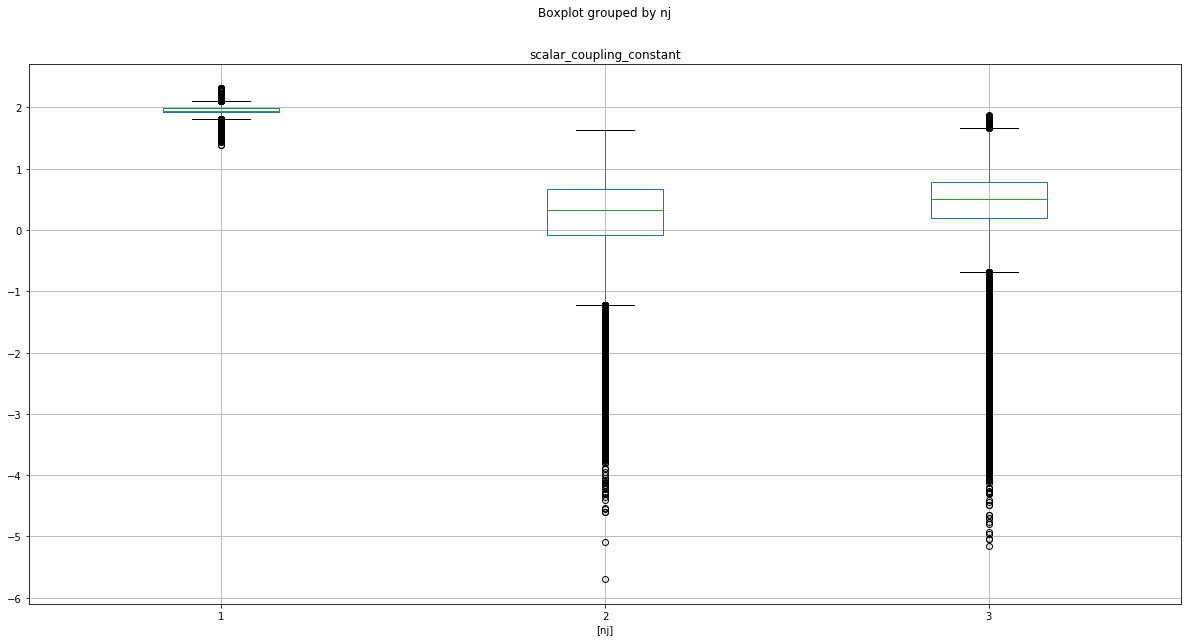

In [53]:
box_plot(dd.read_parquet('../input/feat/traintest_general.parq')['nj'].compute(),Y)

3JHC    2322378
2JHC    1753812
1JHC    1090025
3JHH     908046
2JHH     581162
3JHN     257031
2JHN     183677
1JHN      67558
Name: type, dtype: int64

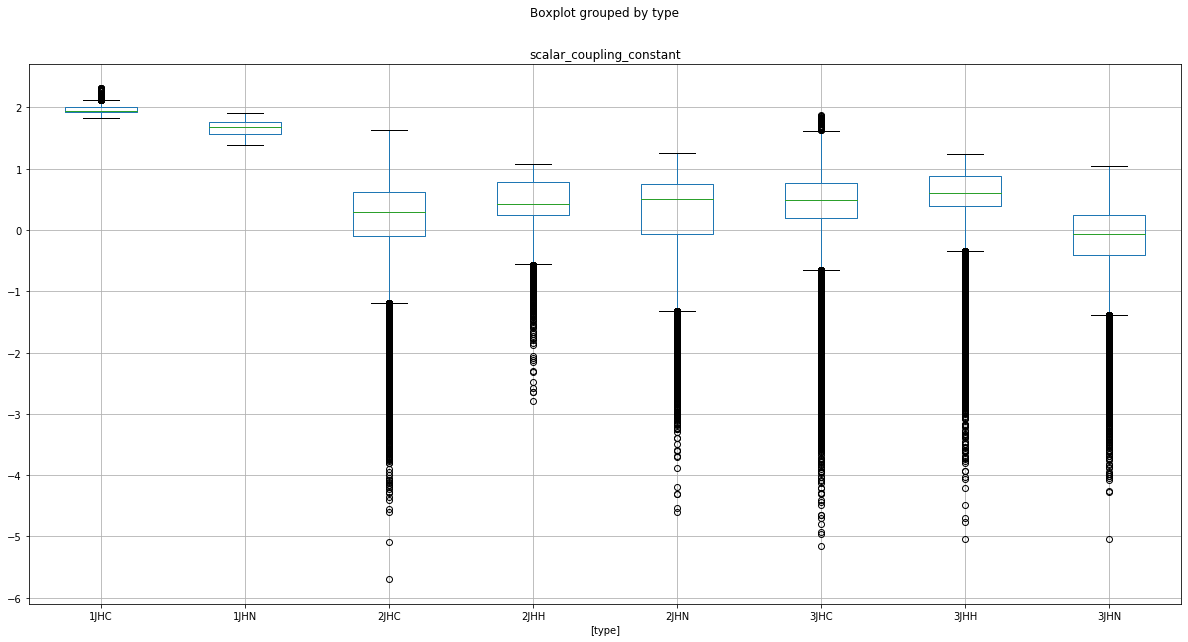

In [54]:
box_plot(dd.read_parquet('../input/feat/traintest_general.parq')['type'].compute(),Y)

HCCC    1810032
HCC     1607633
HC      1090017
HCCH     802854
HCH      568624
HCCN     216287
HCNC     185790
HCN      177778
HCOC     126299
HNCC     103624
HNC       97234
HOCC      91569
HN        67557
HCNH      57898
HOC       48940
HCOH      47286
HNCN      25340
HNH       12530
HCNN      10176
HNN        4029
HOCN       3414
HNNC       3183
HONC       1862
HON        1862
HCON        968
HNNN        846
HOH           1
Name: bond_paths, dtype: int64

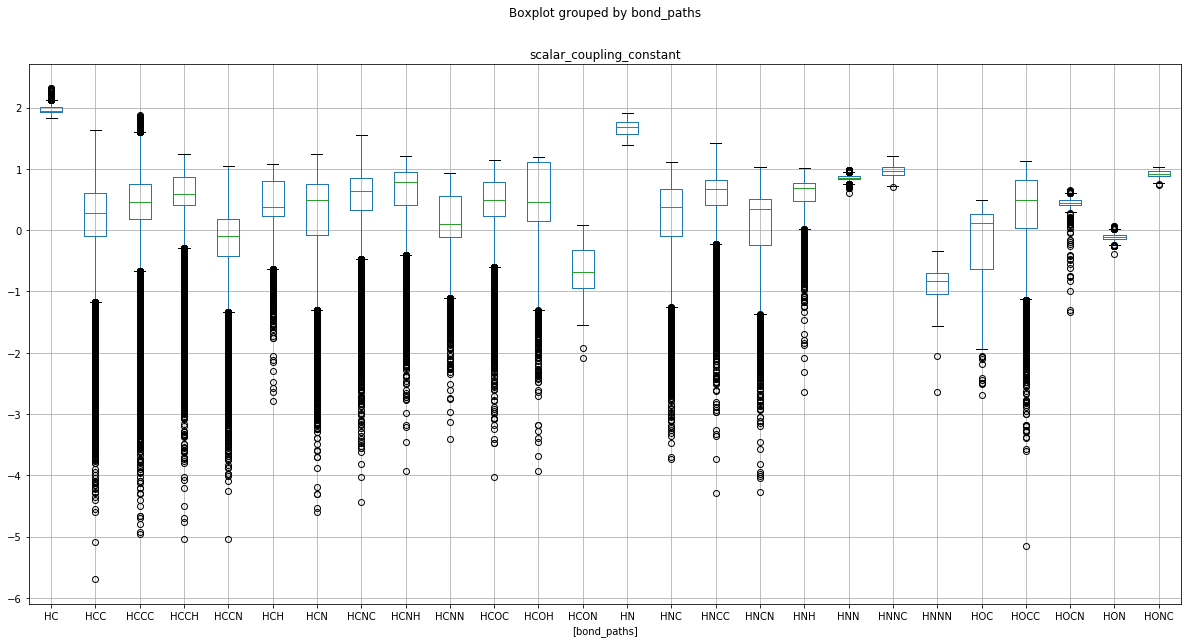

In [55]:
box_plot(dd.read_parquet('../input/feat/traintest_atom.parq')['bond_paths'].compute(),Y)

In [56]:
vc=df[df.index<4658147].value_counts()
print(vc.shape)
vc

(27,)


HCCC    1177489
HCC     1046279
HC       709408
HCCH     522414
HCH      370053
HCCN     140545
HCNC     120624
HCN      115437
HCOC      82308
HNCC      67092
HNC       62566
HOCC      59565
HN        43362
HCNH      37402
HOC       31824
HCOH      30787
HNCN      15917
HNH        7975
HCNN       6645
HNN        2576
HOCN       2169
HNNC       2050
HONC       1232
HON        1232
HCON        613
HNNN        526
HOH           1
Name: bond_paths, dtype: int64

In [57]:
vc=df[df.index>=4658147].value_counts()
print(vc.shape)
vc

(26,)


HCCC    632543
HCC     561354
HC      380609
HCCH    280440
HCH     198571
HCCN     75742
HCNC     65166
HCN      62341
HCOC     43991
HNCC     36532
HNC      34668
HOCC     32004
HN       24195
HCNH     20496
HOC      17116
HCOH     16499
HNCN      9423
HNH       4555
HCNN      3531
HNN       1453
HOCN      1245
HNNC      1133
HONC       630
HON        630
HCON       355
HNNN       320
Name: bond_paths, dtype: int64